In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import date
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Dropping missing values in income

In [5]:
df.dropna(subset=['Income'], axis=0, inplace=True)

Dropping Z_CostContact nd Z_Revenue since the two columns were not defined in the data description given in the pdf file as well as the ID column since it will not be adding anything to my findings

In [6]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [8]:
df.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
unique,NaN,5,8,NaN,NaN,NaN,662,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1116,857,NaN,NaN,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,NaN,49.012635,305.091606,26.356047,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,11.985554,NaN,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,24.000000,2.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,174.500000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,505.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Preprocessing and Cleaning

Dt_Customer is in object type, I'll be converting that to datatime. Also, there is an outlier present in the columns Year_Birth and Income which needs to be removed so as to avoid skewness of the data.

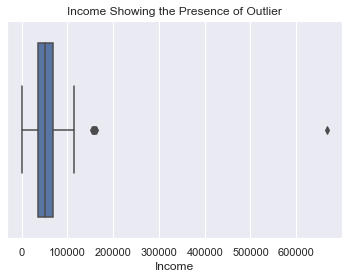

In [9]:
# Using boxplot to confirm the skewness in Income
sns.boxplot(df['Income'])
plt.title("Income Showing the Presence of Outlier");

As expected, we can see the outlier from the boxplot above

In [10]:
# Removing the outlier
df.drop(df[df.Income>100000].index, inplace=True)

In [11]:
# Checking Income to confirm the removal of the outlier
df['Income'].describe()

count     2203.000000
mean     51512.049932
std      20577.702498
min       1730.000000
25%      35187.000000
50%      51250.000000
75%      68134.000000
max      98777.000000
Name: Income, dtype: float64

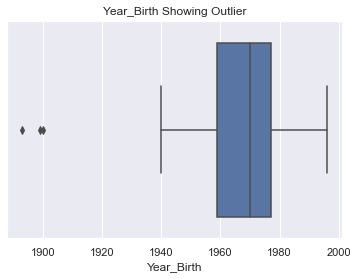

In [12]:
# Using boxplot to visualize Year_Birth
sns.boxplot(df['Year_Birth'])
plt.title("Year_Birth Showing Outlier");

We can see values of 1893, 1900 and 1901. This is highly impossible because anybody with that date of birth will not be alive anymore or will not be capable of making purchases from the company. These rows will be dropped completely

In [13]:
# Dropping outliers in Year_Birth
df.drop(df[df.Year_Birth<1940].index, inplace=True)

In [14]:
# Checking Year_Birth to confirm removal of the anomaly
df['Year_Birth'].describe()

count    2200.000000
mean     1968.902273
std        11.702349
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [15]:
# Converting Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%Y-%m-%d')

In [16]:
df['Dt_Customer'].describe()

count                    2200
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2200 non-null   int64         
 1   Education            2200 non-null   object        
 2   Marital_Status       2200 non-null   object        
 3   Income               2200 non-null   float64       
 4   Kidhome              2200 non-null   int64         
 5   Teenhome             2200 non-null   int64         
 6   Dt_Customer          2200 non-null   datetime64[ns]
 7   Recency              2200 non-null   int64         
 8   MntWines             2200 non-null   int64         
 9   MntFruits            2200 non-null   int64         
 10  MntMeatProducts      2200 non-null   int64         
 11  MntFishProducts      2200 non-null   int64         
 12  MntSweetProducts     2200 non-null   int64         
 13  MntGoldProds         2200 non-nul

The number of entries have reduced but that's fine since we still have enough data to extract insight from

## EDA (Exploratory Data Analysis)

## Checking Response (Target Variable i.e., if customer accepted the offer in the last campaign or otherwise)

In [18]:
df['Response'].value_counts()

0    1871
1     329
Name: Response, dtype: int64

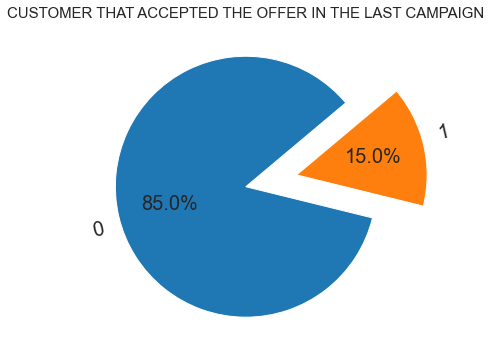

In [19]:
plt.subplots(figsize=(6,6))
data=df['Response']
explode=[0,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, startangle=40, colors=sns.color_palette('tab10',10),
                            explode=explode, rotatelabels='true')
plt.title('CUSTOMER THAT ACCEPTED THE OFFER IN THE LAST CAMPAIGN', fontsize=15)
plt.ylabel('');

The chart above revealed that 15% of the customers accepted the company's product in the last campaign which is significantly higher than other campaigns. 

### Checking Year_Birth 

<Figure size 504x432 with 0 Axes>

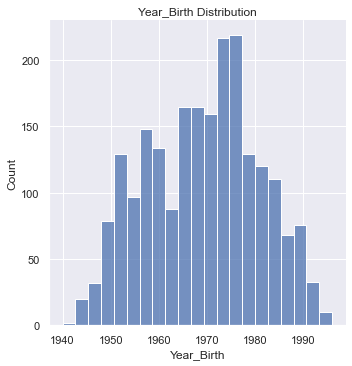

In [20]:
plt.figure(figsize=(7,6))
sns.displot(df['Year_Birth'])
plt.title("Year_Birth Distribution");

From the histogram above, we can see that majority of the customers have their year of birth between 1970-1980

In [21]:
# Getting age in years from Year_Birth of customers
df['Age'] = date.today().year - df['Year_Birth']
df['Age'].describe()

count    2200.000000
mean       53.097727
std        11.702349
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [22]:
# Categorizing Age into groups for better visualization and creating a new columns to called Age_Range
def age_label(row):
    age = row.Age
    if age <= 30:
        return "25 - 30"
    elif age <= 40:
        return "31-40"
    elif age <= 50:
        return "41 - 50"
    elif age <= 60:
        return "51 - 60"
    elif age <= 70:
        return "71 - 80"
    else:
        return "Above 80"

In [23]:
df['Age_Range'] = df.apply(age_label, axis=1)

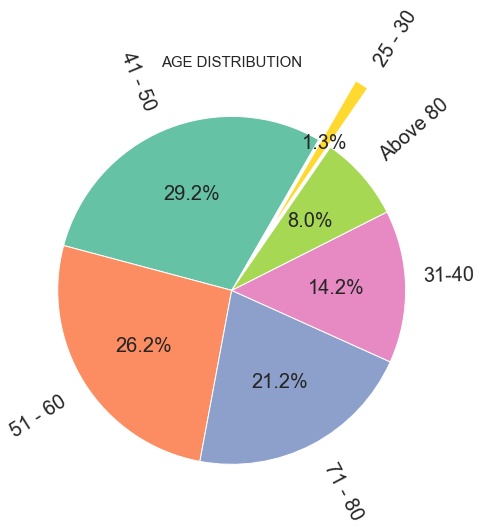

In [24]:
plt.subplots(figsize=(8,8))
data=df["Age_Range"]
explode = [0, 0, 0, 0, 0, 0.4]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=20,colors=sns.color_palette('Set2',10),startangle=60, 
                             explode=explode, rotatelabels='true')
plt.title('AGE DISTRIBUTION', fontsize=15)
plt.ylabel('')
plt.show()

29.2% of the customers are within 41-50 age range which is the highest among the customer base followed by those in the 51-60 age range who make up about 26.2% of the distribution. Only 1.3% are between 25-30 which is the smallest group.

## Exploring Age with response level of customers in the last campaign

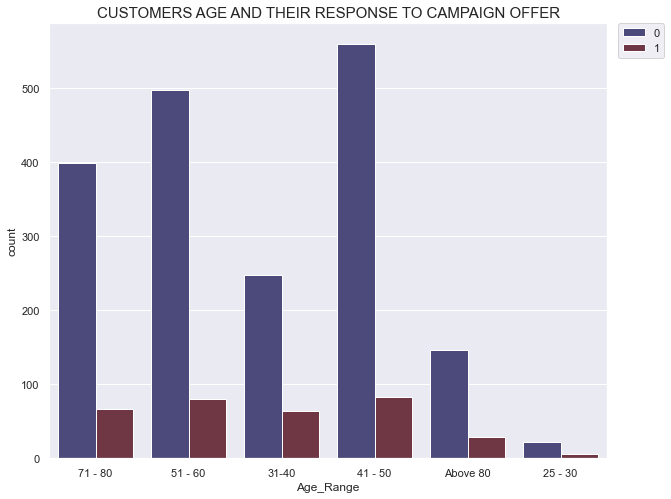

In [25]:
# Using the newly created column 'Age_Range'
plt.figure(figsize=(10,8))
sns.countplot(x='Age_Range', hue='Response', data=df, palette='icefire')
plt.title('CUSTOMERS AGE AND THEIR RESPONSE TO CAMPAIGN OFFER', fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### Checking Education

In [26]:
df['Education'].value_counts()

Graduation    1110
PhD            474
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

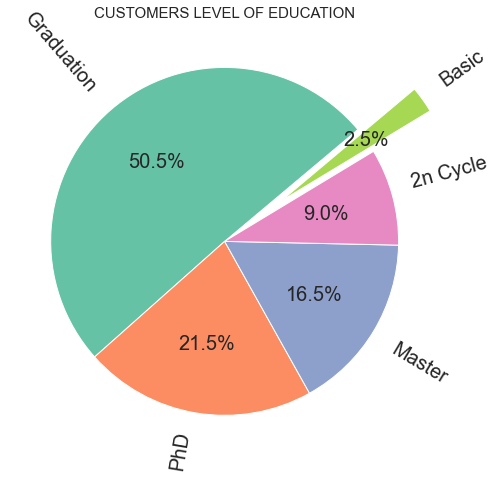

In [27]:
plt.subplots(figsize=(8,8))
data=df['Education']
explode=[0,0,0,0,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, colors=sns.color_palette('Set2',10), startangle=40,
                            explode=explode, rotatelabels='true')
plt.title('CUSTOMERS LEVEL OF EDUCATION', fontsize=15)
plt.ylabel('');

A lot of the company's customer base are educated with majority having a first degree. 

## Exploring Educational level with Response of the customers

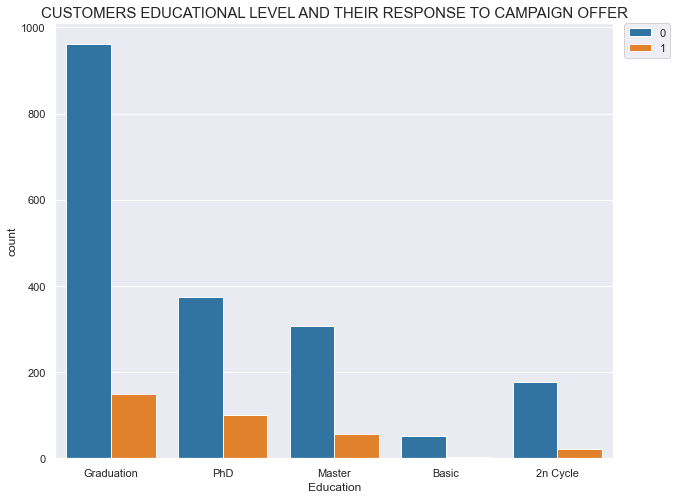

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='Education', hue='Response', data=df, palette='tab10')
plt.title('CUSTOMERS EDUCATIONAL LEVEL AND THEIR RESPONSE TO CAMPAIGN OFFER', fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

As revealed in the data above, majority of the customers are educated and only a small proportion of them accepted the company's offer in the last campaign. Since we have more graduates amongst the customer base, a high propotion of those who accepted the offer in the last campaign was also gotten here.

### Checking Marital Status

In [29]:
df['Marital_Status'].value_counts()

Married     854
Together    566
Single      468
Divorced    229
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [30]:
# Grouping Alone, Absurd and Yolo as Single
def marital_label(top):
    status = top.Marital_Status
    if status == 'Married':
        return 'Married'
    elif status == 'Together':
        return 'Together'
    elif status == 'Divorced':
        return 'Divorced'
    elif status == 'Widow':
        return 'Widow'
    else:
        return 'Single'

In [31]:
df['Marital'] = df.apply(marital_label, axis=1)
df['Marital'].value_counts()

Married     854
Together    566
Single      475
Divorced    229
Widow        76
Name: Marital, dtype: int64

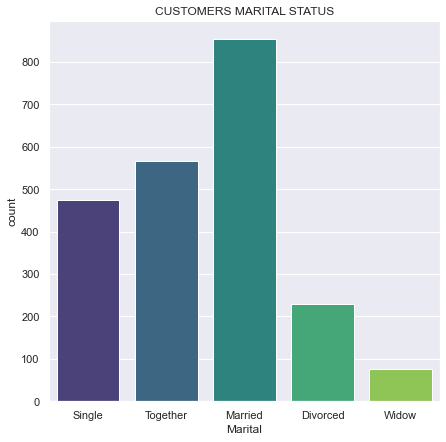

In [32]:
plt.figure(figsize=(7,7))
sns.countplot(df['Marital'], palette='viridis')
plt.title("CUSTOMERS MARITAL STATUS");

It is no surprise that majority of the the company's customers are either married or together with their partners as their age range revealed earlier that a lot of them  are adults in their mid-life

## Checking Marital Status and Response of customers to offers in the last campaign

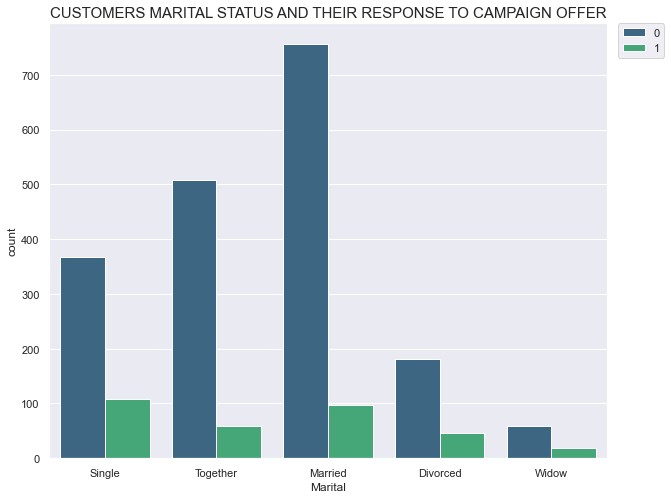

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='Marital', hue='Response', data=df, palette='viridis')
plt.title('CUSTOMERS MARITAL STATUS AND THEIR RESPONSE TO CAMPAIGN OFFER', fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

Single people are flexible and adventurous also, they are more receptive to new products than married or people living together with their spouses as revealed in the chart above with a higher proportion of customers who accepted the products in the last campaign single

### Checking Income

<Figure size 504x504 with 0 Axes>

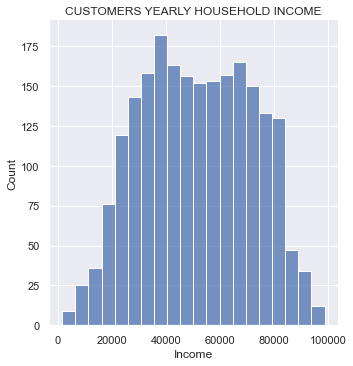

In [34]:
plt.figure(figsize=(7,7))
sns.displot(df['Income'], palette='Set2')
plt.title("CUSTOMERS YEARLY HOUSEHOLD INCOME");

In [35]:
df['Income'].describe()

count     2200.000000
mean     51500.314545
std      20577.132323
min       1730.000000
25%      35178.000000
50%      51222.500000
75%      68130.000000
max      98777.000000
Name: Income, dtype: float64

A lot of the customers are high income earners with majority earning above 30000 annually

## Checking Income and Response of customers to offers in the last campaign

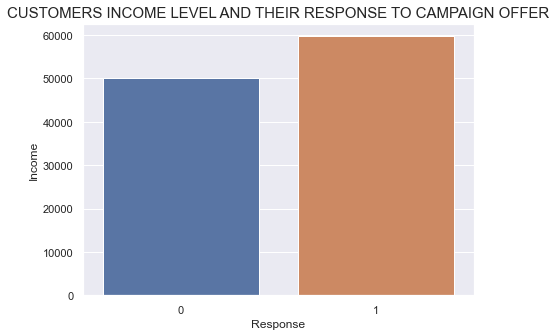

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(x='Response', y='Income', data=df, ci=None)
plt.title('CUSTOMERS INCOME LEVEL AND THEIR RESPONSE TO CAMPAIGN OFFER', fontsize=15);

The chart revealed that customers who earn more respond favorably to the company's campaign.

## Checking Kidhome and Teenhome

In [37]:
df['Kidhome'].value_counts()

0    1271
1     883
2      46
Name: Kidhome, dtype: int64

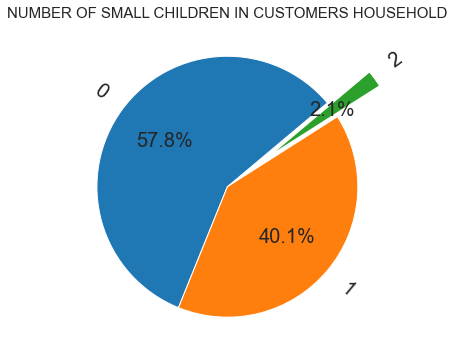

In [38]:
plt.subplots(figsize=(6,6))
data=df['Kidhome']
explode=[0,0,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, colors=sns.color_palette('tab10',10), startangle=40,
                            explode=explode, rotatelabels='true')
plt.title('NUMBER OF SMALL CHILDREN IN CUSTOMERS HOUSEHOLD', fontsize=15)
plt.ylabel('');

In [39]:
df['Teenhome'].value_counts()

0    1134
1    1015
2      51
Name: Teenhome, dtype: int64

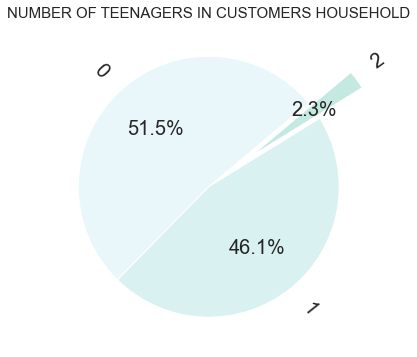

In [40]:
plt.subplots(figsize=(6,6))
data=df['Teenhome']
explode=[0,0,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, colors=sns.color_palette('BuGn',10), startangle=40,
                            explode=explode, rotatelabels='true')
plt.title('NUMBER OF TEENAGERS IN CUSTOMERS HOUSEHOLD', fontsize=15)
plt.ylabel('');

More than 50% of the customers do no have either a child or teenager at home. 

## Checking Dt_Customer

In [41]:
df['Dt_Customer'].nunique()

662

In [42]:
df['Dt_Customer'].value_counts().head(20)

2012-08-31    12
2013-02-14    11
2014-05-12    11
2012-09-12    11
2014-05-22    10
2013-08-20    10
2012-10-29     9
2013-01-02     9
2014-04-05     9
2014-03-23     9
2012-08-22     8
2013-05-11     8
2013-11-07     8
2014-05-11     8
2013-08-31     8
2014-03-01     8
2012-08-29     8
2012-08-17     8
2012-11-23     8
2013-10-28     8
Name: Dt_Customer, dtype: int64

2012-08-31 had the most customer enrollment with the company

In [43]:
# Getting the year of enrollment alone and storing it in a new column
df['Year_Customer_Enrollment']=df['Dt_Customer'].dt.year
df['Year_Customer_Enrollment'].value_counts()

2013    1163
2014     549
2012     488
Name: Year_Customer_Enrollment, dtype: int64

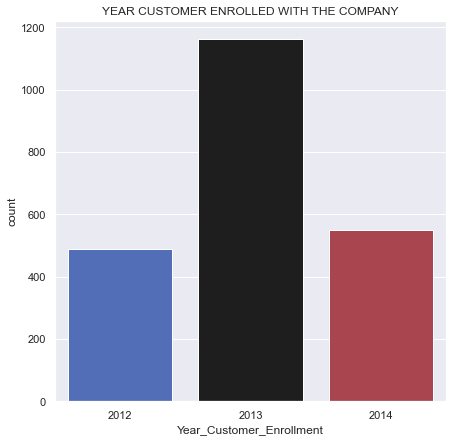

In [44]:
plt.figure(figsize=(7,7))
sns.countplot(df['Year_Customer_Enrollment'], palette='icefire')
plt.title('YEAR CUSTOMER ENROLLED WITH THE COMPANY');

The year 2013 had the most customer enrollment with the company

In [45]:
df['Month_Enrollment'] = df['Dt_Customer'].dt.month_name()
df['Month_Enrollment'].value_counts()

August       217
May          211
October      210
March        207
January      194
September    189
November     182
April        179
February     176
December     175
June         160
July         100
Name: Month_Enrollment, dtype: int64

August has always been the most productive month for the company as it had the highest number of customer enrollment closely followed by May, October and March in the years captured in the data

In [46]:
# Getting year and month from Dt_Customer to check the months with the most activity in each year
df['Year_Month_Enrollment'] = df['Dt_Customer'].dt.to_period('M')
df['Year_Month_Enrollment'].value_counts()

2012-08    116
2013-10    115
2014-05    109
2014-03    107
2013-01    106
2013-05    102
2013-08    101
2013-03    100
2013-02     99
2013-07     98
2012-09     97
2012-11     95
2012-10     95
2014-04     94
2013-09     92
2013-12     92
2014-01     88
2013-11     87
2013-06     86
2013-04     85
2012-12     83
2014-02     77
2014-06     74
2012-07      2
Freq: M, Name: Year_Month_Enrollment, dtype: int64

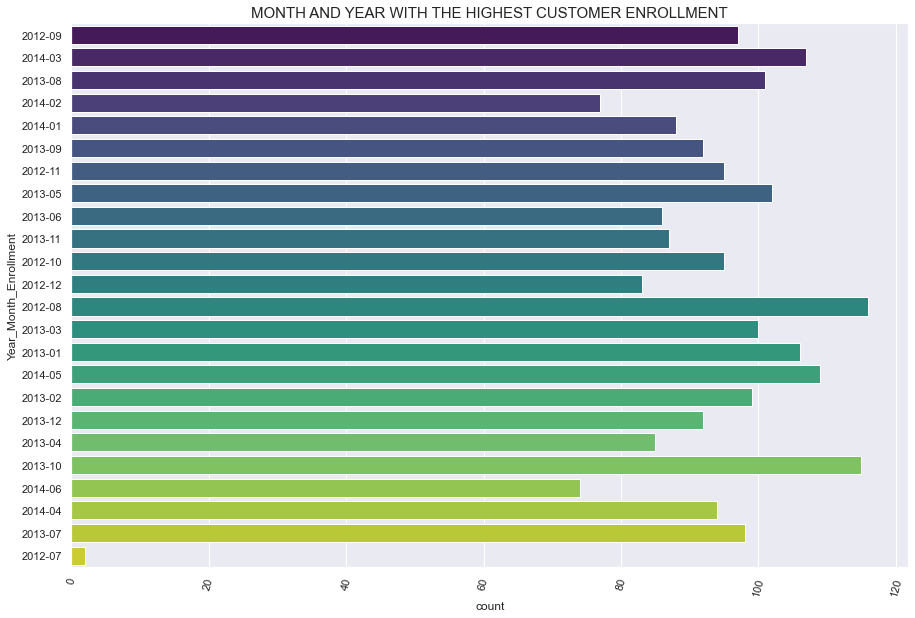

In [47]:
# Using countplot to visualize month and year 
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
plt.title('MONTH AND YEAR WITH THE HIGHEST CUSTOMER ENROLLMENT', fontsize=15)
sns.countplot(y=df['Year_Month_Enrollment'], palette='viridis');

Following the trend above with august being the month with the most enrollment, we can see that in 2012, August had the most activity as well as the third most activity in 2013. October was the best month in 2013 while May was the month with highest enrollment in 2014.

In [48]:
# Getting the number of days customers enrolled in the company
df['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'D')
df['Customer_Days'].describe()

count    2200.000000
mean     3200.575000
std       202.548198
min      2847.000000
25%      3027.000000
50%      3202.000000
75%      3376.000000
max      3546.000000
Name: Customer_Days, dtype: float64

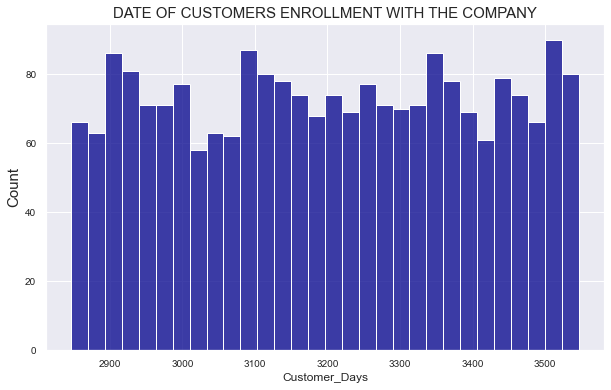

In [49]:
#histogram
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=df, x="Customer_Days", bins=30, color='darkblue')
ax.set_title('DATE OF CUSTOMERS ENROLLMENT WITH THE COMPANY', fontsize=15)
ax.set_ylabel ('Count', fontsize=15)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

## Checking Complain (if customer complained in the last 2 years)

In [50]:
df['Complain'].value_counts()

0    2180
1      20
Name: Complain, dtype: int64

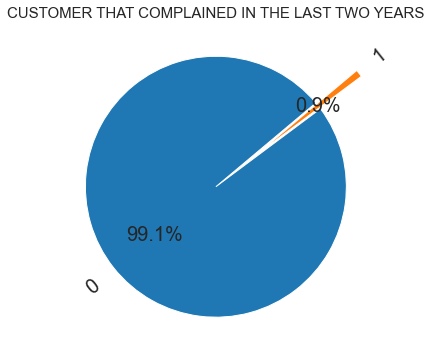

In [51]:
plt.subplots(figsize=(6,6))
data=df['Complain']
explode=[0,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, startangle=40, colors=sns.color_palette('tab10',10),
                            explode=explode, rotatelabels='true')
plt.title('CUSTOMER THAT COMPLAINED IN THE LAST TWO YEARS', fontsize=15)
plt.ylabel('');

This is a good one as it shows that less than 1% of the client base expressed concern at the company in the last two years. We can conclude that in the last two years, customers are satisfied with the company's products.

In [52]:
# Dropping columns
df.drop(['Dt_Customer', 'Age_Range', 'Year_Customer_Enrollment', 'Month_Enrollment',
         'Year_Month_Enrollment'], axis=1, inplace=True)

## Checking Correlation Between Columns

In [53]:
# Dropping unused columns
df.drop(['Year_Birth', 'Marital_Status'], axis=1, inplace=True)

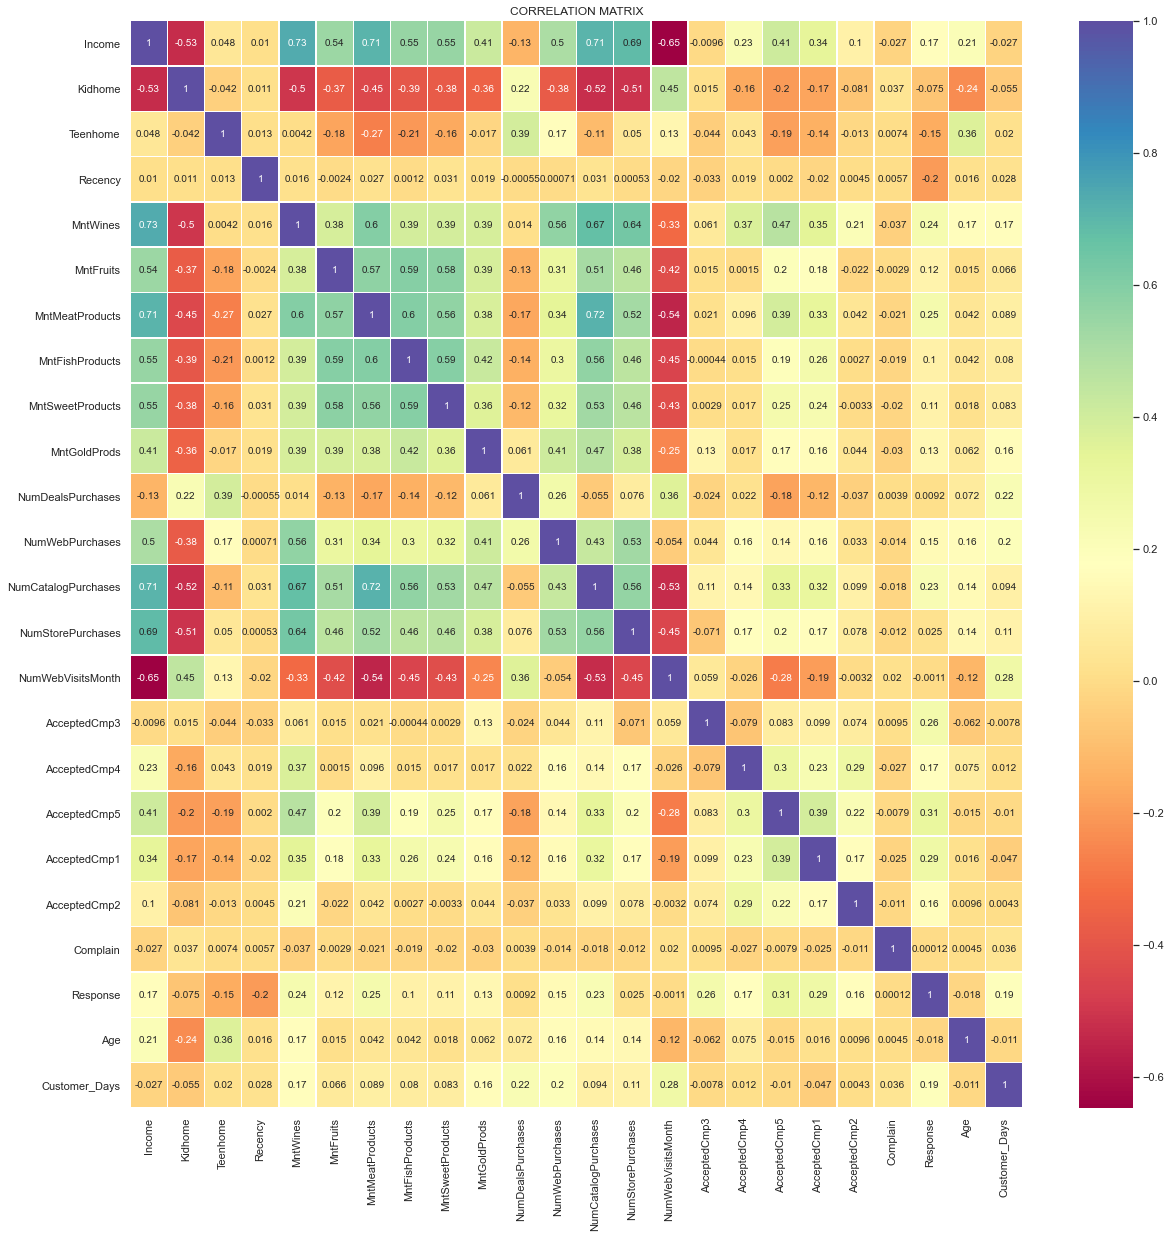

In [54]:
# Using heatmap to check correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', linewidths=.5)
plt.title('CORRELATION MATRIX');

In [55]:
# Getting dummy variables for categorical variables
dummy_edu = pd.get_dummies(df['Education'], prefix='education')
dummy_mar = pd.get_dummies(df['Marital'], prefix='marital')
df = pd.concat([df, dummy_edu, dummy_mar], axis=1)

In [56]:
# Dropping columns not needed for clustering and storing it in a new variable
df.drop(['Education', 'Marital'], axis=1, inplace=True)

## Customer Segmentation

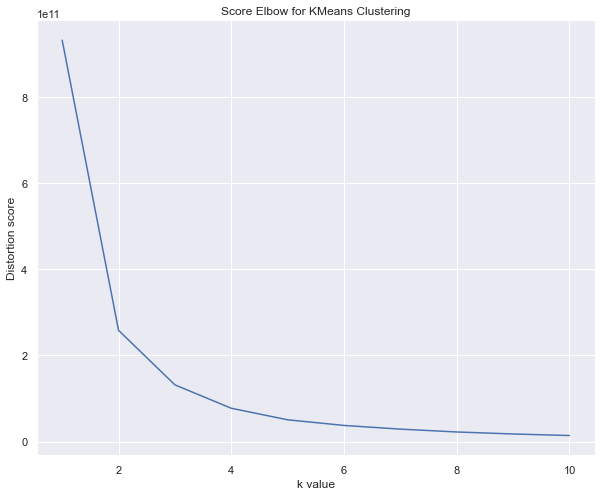

In [57]:
kmeans_eval = []

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(df)
    kmeans_eval.append(kmeans_model.inertia_)

# Plot Kmeans for k from 1 to 10 criterion
plt.figure(figsize=(10,8))
plt.plot(range(1,11), kmeans_eval)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k value')
plt.ylabel('Distortion score')
plt.show()

## Fitting kmeans to the dataset with k=3

In [58]:
## fit and predict clusters
kmeans_model = KMeans(n_clusters=3)
df['cluster'] = kmeans_model.fit_predict(df)

In [59]:
kmeans_model.labels_

array([2, 2, 0, ..., 2, 0, 2])

In [60]:
df['cluster'].value_counts()

2    763
0    722
1    715
Name: cluster, dtype: int64

Three clusters have been formed from the data, with the third cluster having the highest number of customers

In [61]:
# checking centroids
print(kmeans_model.cluster_centers_)

[[ 7.51076828e+04  9.27977839e-02  3.86426593e-01  4.93088643e+01
   6.23534626e+02  5.65664820e+01  3.85078947e+02  8.09667590e+01
   5.85969529e+01  7.06592798e+01  1.68144044e+00  5.48614958e+00
   5.29362881e+00  8.48199446e+00  3.32132964e+00  7.20221607e-02
   1.32963989e-01  2.14681440e-01  1.74515235e-01  2.49307479e-02
   6.92520776e-03  2.31301939e-01  5.46398892e+01  3.19261496e+03
   7.75623269e-02  4.16333634e-17  5.30470914e-01  1.56509695e-01
   2.35457064e-01  1.09418283e-01  3.83656510e-01  2.04986150e-01
   2.60387812e-01  4.15512465e-02]
 [ 2.79148501e+04  8.13725490e-01  3.08123249e-01  4.82927171e+01
   2.90952381e+01  5.79971989e+00  2.46470588e+01  9.04341737e+00
   5.95518207e+00  1.73515406e+01  2.13865546e+00  2.11204482e+00
   5.22408964e-01  3.06022409e+00  6.90756303e+00  8.40336134e-02
   4.20168067e-03 -1.94289029e-16  1.40056022e-03  0.00000000e+00
   1.40056022e-02  1.12044818e-01  4.87759104e+01  3.19914566e+03
   1.16246499e-01  7.56302521e-02  5.0280

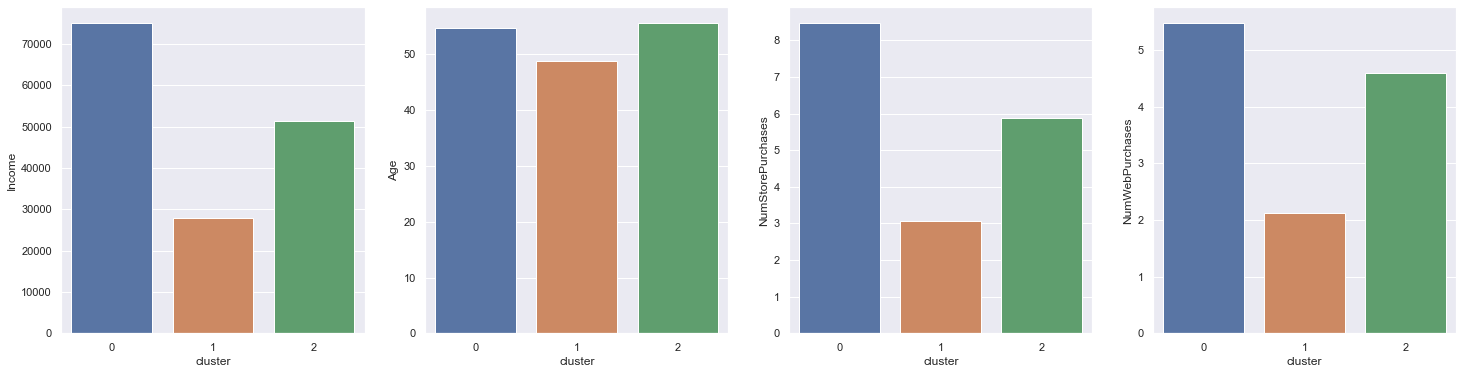

In [62]:
# Checking cluster with Income, Age, NumStorePurchases and NumWebPurchases using barplot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.barplot(x=df['cluster'], y=df['Income'], ci=None, ax=ax[0])
sns.barplot(x=df['cluster'], y=df['Age'], ci=None, ax=ax[1])
sns.barplot(x=df['cluster'], y=df['NumStorePurchases'], ci=None, ax=ax[2])
sns.barplot(x=df['cluster'], y=df['NumWebPurchases'], ci=None, ax=ax[3]);

- Income: The first clustered group earned the most income
- Age: There isn't much diversity in the age of the clustered groups
- NumStorePurchases: The first group made the most purchases directly from the store which could be because they earned more income
- NumWebPurchases: Same with the store purchases as the first clustered group made the most web purchases

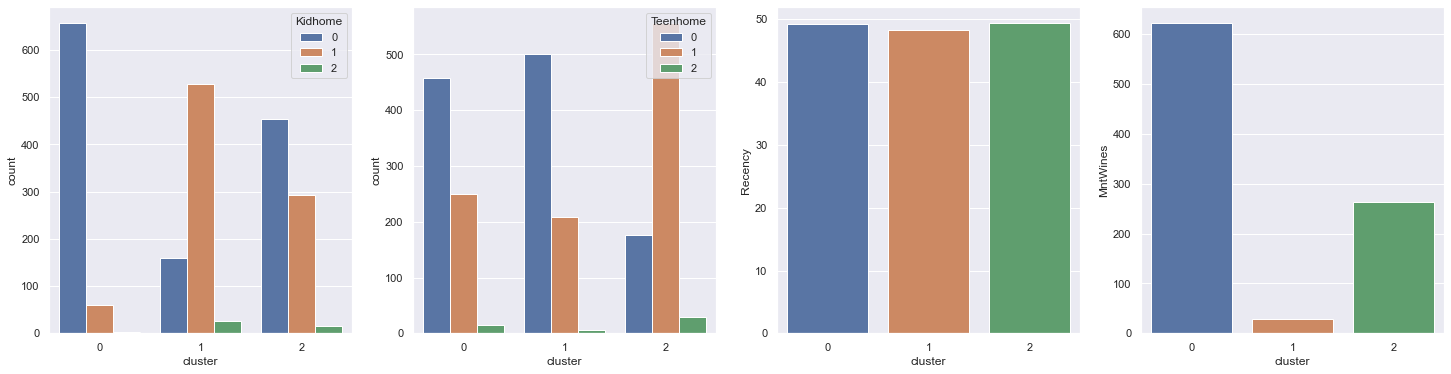

In [63]:
# Checking cluster with Kidhome, Teenhome, Recency and MntWines using countplot and bar plot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.countplot(x=df['cluster'], hue=df['Kidhome'], ax=ax[0])
sns.countplot(x=df['cluster'], hue=df['Teenhome'], ax=ax[1])
sns.barplot(x=df['cluster'], y=df['Recency'], ci=None, ax=ax[2])
sns.barplot(x=df['cluster'], y=df['MntWines'], ci=None, ax=ax[3]);

- Recency: The three clustered groups have almost identical number of days since they made last purchases
- MntWines: Again, cluster 1 had the most number of wine purchases 

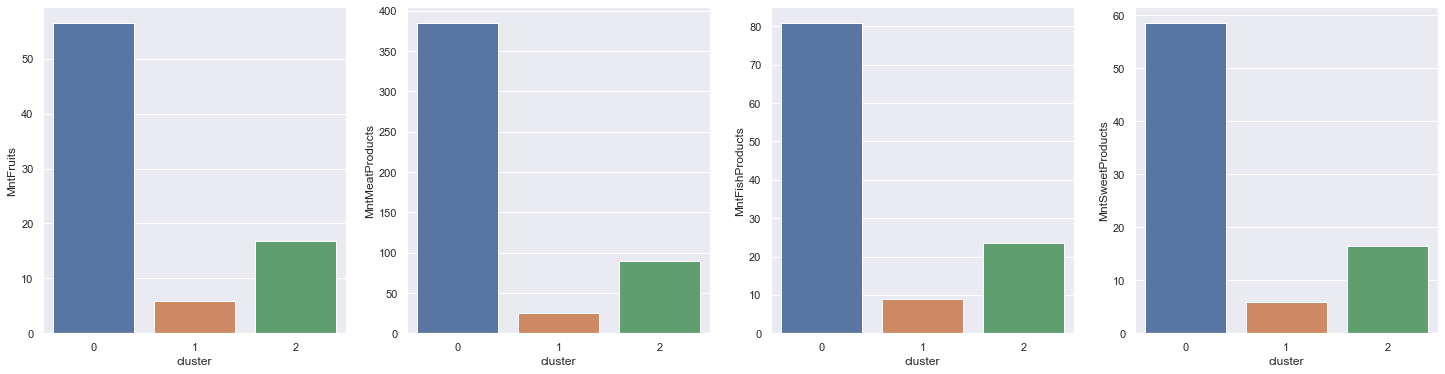

In [64]:
# Checking cluster with MntFruits, MntMeatProducts, MntFishProducts and MntSweetProducts using countplot and bar plot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.barplot(x=df['cluster'], y=df['MntFruits'], ci=None, ax=ax[0])
sns.barplot(x=df['cluster'], y=df['MntMeatProducts'], ci=None, ax=ax[1])
sns.barplot(x=df['cluster'], y=df['MntFishProducts'], ci=None, ax=ax[2])
sns.barplot(x=df['cluster'], y=df['MntSweetProducts'], ci=None, ax=ax[3]);

- Cluster 2 had the most fruits, meat, fish and sweet purchases

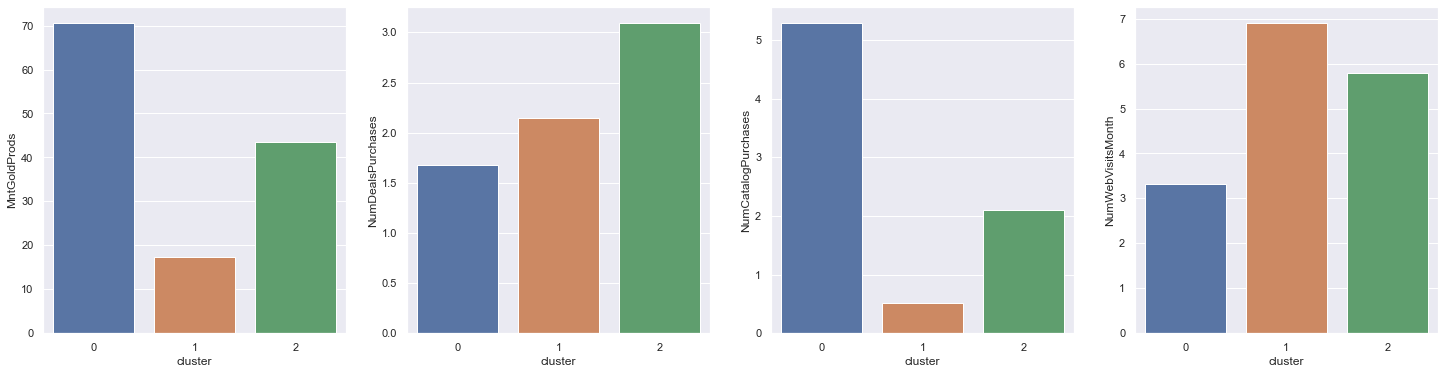

In [65]:
# Checking cluster with MntGoldProds, NumDealsPurchases, MntFishProducts and MntSweetProducts using bar plot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.barplot(x=df['cluster'], y=df['MntGoldProds'], ci=None, ax=ax[0])
sns.barplot(x=df['cluster'], y=df['NumDealsPurchases'], ci=None, ax=ax[1])
sns.barplot(x=df['cluster'], y=df['NumCatalogPurchases'], ci=None, ax=ax[2])
sns.barplot(x=df['cluster'], y=df['NumWebVisitsMonth'], ci=None, ax=ax[3]);

- Cluster 1 had the most Gold purchases as well as making the highest number of purchases using a catalog
- Cluster 3 had the most purchases made using a discount
- Cluster 2 had the highest number of visits to the company's website in the past month

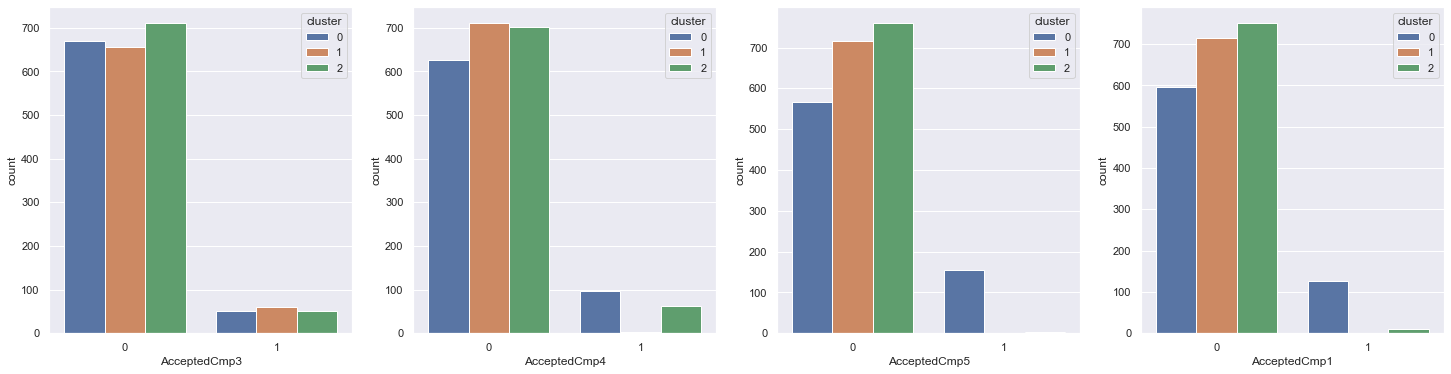

In [66]:
# Checking cluster with AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 and AcceptedCmp1 using count plot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.countplot(x=df['AcceptedCmp3'], hue=df['cluster'], ax=ax[0])
sns.countplot(hue=df['cluster'], x=df['AcceptedCmp4'], ax=ax[1])
sns.countplot(hue=df['cluster'], x=df['AcceptedCmp5'], ax=ax[2])
sns.countplot(hue=df['cluster'], x=df['AcceptedCmp1'], ax=ax[3]);

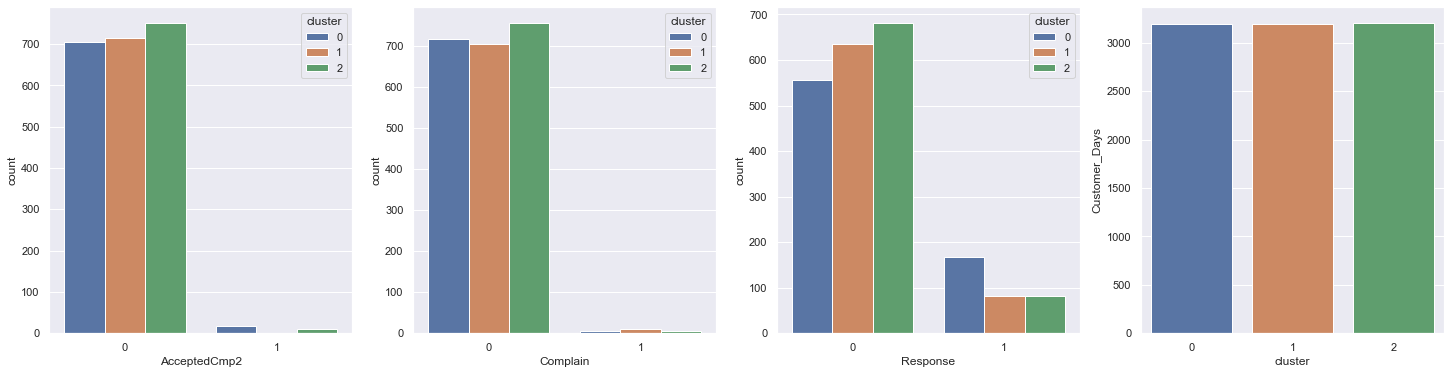

In [67]:
# Checking cluster with AcceptedCmp2, Complain, Response and Customer_Days using count and bar plot
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.countplot(hue=df['cluster'], x=df['AcceptedCmp2'], ax=ax[0])
sns.countplot(hue=df['cluster'], x=df['Complain'], ax=ax[1])
sns.countplot(hue=df['cluster'], x=df['Response'], ax=ax[2])
sns.barplot(x=df['cluster'], y=df['Customer_Days'], ci=None, ax=ax[3]);

- Cluster 1 are the ones who are most likely to accept a new offer from the company whenever the company launches a new product.
- The three clusters are a long time customers of the company 

## Modeling

### Using logistic regression to predict customers response to company's offer

In [68]:
# Splitting the data into feature and target
X = df.drop(['Response', 'cluster'], axis=1)
y = df['Response']

In [69]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Generating the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Getting predictions
predictions = model.predict(X_test)
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [72]:
# Generating classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       558
           1       0.53      0.17      0.25       102

    accuracy                           0.85       660
   macro avg       0.70      0.57      0.58       660
weighted avg       0.81      0.85      0.81       660



In [73]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[543,  15],
       [ 85,  17]], dtype=int64)

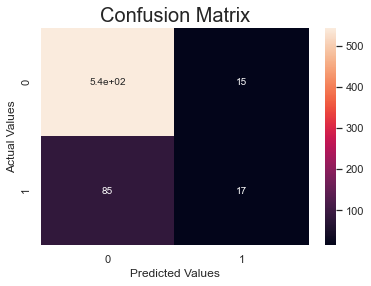

In [74]:
# Using heat map to chek the confusion matrix
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

This model can successfully predict 85% of the time whether a customer will respond to the company's offer or not.

In [75]:
# Checking the pseudo r squared value of the model
logit = sm.Logit(y, X)
logit_model = logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.243035
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2200
Model:                          Logit   Df Residuals:                     2168
Method:                           MLE   Df Model:                           31
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                  0.4240
Time:                        03:17:57   Log-Likelihood:                -534.68
converged:                       True   LL-Null:                       -928.22
Covariance Type:            nonrobust   LLR p-value:                1.597e-145
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Income                1.873e-05   9.86e-06      1.900      0.057   -5.87e-07     3.8e-05

 A pseudo R-Squared value of 0.424 and a p-value less than 0.05 indicates that the model is an excellent fit for this data set 